### After we finished our EDA on original data, we can start building different models to perform classification tasks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import seaborn as sns
import sklearn
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("Data/iris.csv")

In [3]:
df_no_ID = df.drop(columns=["Id"])

In [4]:
df_no_ID.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### First, we split the data using sk-learn

In [5]:
x = df_no_ID.drop(columns=["Species"])
y = df_no_ID["Species"]
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Please note that Species are strings but not numbers which will cause issues when we do the classification.
### Normally we will set data into numberal data for easier processing.
### For example we can set Iris-setosa as 0, Iris-versicolor as 1, and Iris-virginica as 2 for better understanding

In [6]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [7]:
# Split the data into training and test sets, parameter test_size to 30% => 30% testing data, 70% trainning data
# note we fixed the random_state to make sure we'll get same split everytime we run the code
# so that we will not coincidently getting different models when running codes repeatedly.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(f'Training Set: {x_train.shape[0]} samples, Testing Set: {x_test.shape[0]} samples')

Training Set: 105 samples, Testing Set: 45 samples


### Before building models, we want to make sure our features are standardized. The reason for standardization is that for different features, it might be in different scale. Without standardized the data, the model might be heavily biased.

Noted: After Standardscaler, the data type will be changed from type: dataframe into a Numpy array

In [8]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

pd.DataFrame(x_train_std, columns=x.columns).head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.023664,-2.378463,-0.182950,-0.291459
1,0.695175,-0.101903,0.930661,0.737219
2,0.924353,0.581065,1.042022,1.637313
3,0.122229,-1.923151,0.652258,0.351465
4,0.924353,-1.240183,1.097702,0.737219


### From this point we can move on to build our model

## 1. Logistic Model

In [9]:
# start timer
start_time1 = time.time()

# first creating sklearn logistic regression model object
model1_logistic = sklearn.linear_model.LogisticRegression(max_iter=200,random_state=0)
# fit in data for training
model1_logistic.fit(x_train_std, y_train)

# End time
end_time1 = time.time()

print(f"Training time = {round((end_time1 - start_time1), 4):} seconds")

Training time = 0.0704 seconds


In [10]:
# Start to validate our model with test data
# first of all, we use our model to ouput our predictions
y_pred = model1_logistic.predict(x_test_std)

score_model1 = accuracy_score(y_test, y_pred)

print("Model: Logistic Regression, Used Features: 4")
print("Accuracy:", score_model1)

Model: Logistic Regression, Used Features: 4
Accuracy: 0.9777777777777777


### Looks alright, but note that from our EDA process, we found that the Petal data (width and length) seems to be better features than Sepal data. So we assume that even using Petal information only might still give a good enoguh result.

In [11]:
x_train2 = x_train.iloc[:, [2, 3]]
x_test2 = x_test.iloc[:, [2, 3]]

In [12]:
scaler = StandardScaler()
x_train_2 = scaler.fit_transform(x_train2)
x_test_2 = scaler.transform(x_test2)

start_time2 = time.time()
model2_logistic = sklearn.linear_model.LogisticRegression(max_iter=200, random_state=0)
model2_logistic.fit(x_train_2, y_train)
end_time2 = time.time()

y_pred_2 = model2_logistic.predict(x_test_2)
score_model2 = accuracy_score(y_test, y_pred_2)

print("Model: Logistic Regression, Used Features: 4")
print("Accuracy:", score_model1)
print()

print("Model: Logistic Regression, Used Features: 2")
print("Accuracy:", score_model2)
print()

print("Time for training model1:")
print(f"Training time = {round((end_time1 - start_time1), 4):} seconds")
print()

print("Time for training model2:")
print(f"Training time = {round((end_time2 - start_time2), 4):} seconds")
print()


Model: Logistic Regression, Used Features: 4
Accuracy: 0.9777777777777777

Model: Logistic Regression, Used Features: 2
Accuracy: 0.9555555555555556

Time for training model1:
Training time = 0.0704 seconds

Time for training model2:
Training time = 0.0017 seconds



In [13]:
time1 = round((start_time1 - end_time1), 4)
time2 = round((start_time2 - end_time2), 4)

print(f"Training time change in percentage: {round(((time2 - time1) / time1 * 100), 2)}%")
print(f"Accuracy change in percentage: {round(((score_model2 - score_model1) / score_model1 * 100), 2)}%")

Training time change in percentage: -97.59%
Accuracy change in percentage: -2.27%


### As we can see above, by only giving little of lost in accuracy we save a lot of time in training. In a more practical field, training cost can be enormous, and that is why EDA can be helpful when deciding main features.

## 2. SVM (Support Vector Machine)
It can be another helpful weapon when it comes to classification task. Let us play around with it.

In [14]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
start_time1 = time.time()
model3_svm = sklearn.svm.SVC()
model3_svm.fit(x_train, y_train)
end_time1 = time.time()

start_time2 = time.time()
model4_svm = sklearn.svm.SVC()
model4_svm.fit(x_train_2, y_train)
end_time2 = time.time()

y_pred = model3_svm.predict(x_test)
y_pred_2 = model4_svm.predict(x_test_2)

score_model3 = accuracy_score(y_test, y_pred)
score_model4 = accuracy_score(y_test, y_pred_2)

print("Model: SVM, Used Features: 4")
print("Accuracy:", score_model3)
print()

print("Model: SVM, Used Features: 2")
print("Accuracy:", score_model4)
print()

print("Time for training model1:")
print(f"Training time = {round((end_time1 - start_time1), 4):} seconds")
print()

print("Time for training model2:")
print(f"Training time = {round((end_time2 - start_time2), 4):} seconds")
print()

Model: SVM, Used Features: 4
Accuracy: 0.9777777777777777

Model: SVM, Used Features: 2
Accuracy: 0.9777777777777777

Time for training model1:
Training time = 0.0018 seconds

Time for training model2:
Training time = 0.0006 seconds



In [16]:
time1 = round((start_time1 - end_time1), 4)
time2 = round((start_time2 - end_time2), 4)

print(f"Training time change in percentage: {round(((time2 - time1) / time1 * 100), 2)}%")
print(f"Accuracy change in percentage: {round(((score_model3 - score_model4) / score_model1 * 100), 2)}%")

Training time change in percentage: -66.67%
Accuracy change in percentage: 0.0%


### In SVM, we can basically ignore the information given from Sepal. By using Petal (width and length) standalone, the model prediction is identical with good accuracy.

# 3. Random Forest

In [17]:
# Parameter in randomForest
# n_estimators: The number of trees in the forest.
# random_state: Controls the randomness of the estimator.
# max_depth: The maximum depth of the tree.

start_time1 = time.time()
model5_randomforest = sklearn.ensemble.RandomForestClassifier(n_estimators=100, max_depth= None, random_state=0)
model5_randomforest.fit(x_train, y_train)
end_time1 = time.time()

start_time2 = time.time()
model6_randomforest = sklearn.ensemble.RandomForestClassifier(n_estimators=100, max_depth= None, random_state=0)
model6_randomforest.fit(x_train_2, y_train)
end_time2 = time.time()

y_pred = model5_randomforest.predict(x_test)
y_pred_2 = model6_randomforest.predict(x_test_2)

score_model5 = accuracy_score(y_test, y_pred)
score_model6 = accuracy_score(y_test, y_pred_2)

print("Model: Random Forest, Used Features: 4")
print("Accuracy:", score_model5)
print()

print("Model: Random Forest, Used Features: 2")
print("Accuracy:", score_model6)
print()

print("Time for training model1:")
print(f"Training time = {round((end_time1 - start_time1), 4):} seconds")
print()

print("Time for training model2:")
print(f"Training time = {round((end_time2 - start_time2), 4):} seconds")
print()

Model: Random Forest, Used Features: 4
Accuracy: 0.9777777777777777

Model: Random Forest, Used Features: 2
Accuracy: 0.9555555555555556

Time for training model1:
Training time = 0.1475 seconds

Time for training model2:
Training time = 0.0389 seconds



### We can plot the below feature importance plot in our random forest to see how the model think which feature is more important.

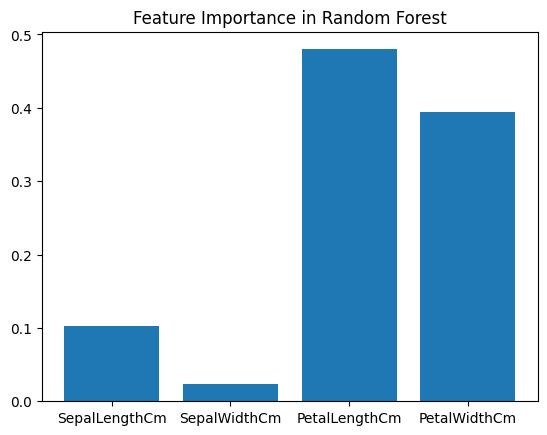

In [18]:
importances = model5_randomforest.feature_importances_
features = x.columns

plt.bar(features, importances)
plt.title("Feature Importance in Random Forest")
plt.show()

# Neural Networks

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [20]:
# change into tensor
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_ds = TensorDataset(x_train_tensor, y_train_tensor)
test_ds = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=64, shuffle=False)

In [21]:
class MLP(nn.Module):
    def __init__(self, layers=[64,16,3]):
        super(MLP, self).__init__()
        
        self.mlp = nn.Sequential(
            nn.Linear(4, layers[0]),
            nn.ReLU(),
            nn.Linear(layers[0], layers[1]),
            nn.ReLU(),
            nn.Linear(layers[1], layers[2])
        )
    def forward(self, x):
        return self.mlp(x)

model_NN = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_NN.parameters(), lr=0.001)


# Trainning Stage
start_time = time.time()
epochs = 100
for epoch in range(epochs):
    model_NN.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model_NN(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        
    if (epoch+1) % 20 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")
end_time = time.time()

# Evaluation
model_NN.eval()
correct = 0
total = 0
with torch.no_grad():
    for x, y in test_loader:
        y_pred = model_NN(x)
        _, predicted = torch.max(y_pred, 1)
        correct += (predicted == y).sum().item()
        total += y.size(0)
print(f"Test Accuracy: {correct/total:.4f}")

Epoch 20, Loss: 0.3792
Epoch 40, Loss: 0.0397
Epoch 60, Loss: 0.1766
Epoch 80, Loss: 0.0865
Epoch 100, Loss: 0.0024
Test Accuracy: 0.9778


In [22]:
print("Time for training:")
print(f"Training time = {round((end_time - start_time), 4):} seconds")
print()


Time for training:
Training time = 0.2516 seconds

